In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
import os
import random

mpl.rc('image', cmap='gray_r')

In [66]:
# Transformation matrices
P = np.array([[0, 0, 0, 1],
              [1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0]])
Pstar = np.array([[0, 1, 0, 0],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1],
                  [1, 0, 0, 0]])
P@P

array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [3]:
# real image
Mreal = np.array([[0, 0, 0, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0],
                  [0, 1, 1, 0]])
Mreal = np.ones((4,4)) - Mreal
# distorted image
Mmang = Mreal@P

# corrected input
Mstar = Mreal@Pstar

# np.linalg.det(Mreal)

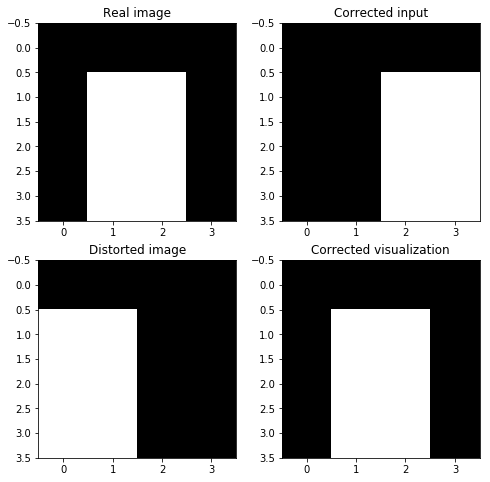

In [4]:
# plt.figure(1)
def vis_matrices(Mr, Mm, Mst, P):
    if Mr.shape[0]==1:
        Mr = Mr.reshape(int(np.sqrt(Mr.shape[1])), int(np.sqrt(Mr.shape[1])))
        Mm = Mm.reshape(int(np.sqrt(Mm.shape[1])), int(np.sqrt(Mm.shape[1])))
        Mst = Mst.reshape(int(np.sqrt(Mst.shape[1])), int(np.sqrt(Mst.shape[1])))
    
    fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=2) #, squeeze=True, sharey=True)
    fig.set_size_inches(8,8)

    plt.sca(ax1[0])
    plt.imshow(Mr)
    plt.title("Real image")

    plt.sca(ax2[0])
    plt.imshow(Mm)
    plt.title("Distorted image")

    plt.sca(ax1[1])
    plt.imshow(Mst)
    plt.title("Corrected input")

    plt.sca(ax2[1])
    plt.imshow(Mst@P)
    plt.title("Corrected visualization")
vis_matrices(Mreal, Mmang, Mstar, P)

In [5]:
# Define the randomization criteria
# proportions of one and zeros in the random matrices
cut = np.linspace(0.3,0.8,6)
nbpix = 4
nb_per_cut = 100
nb_cut = len(cut)
nb_sample = nb_per_cut*nb_cut

In [6]:
np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cut[5], cut[5]])

array([[1, 1, 1, 1],
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [7]:
# generating the dataset
Mreal_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mmang_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mstar_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))

Mreal_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mmang_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))
Mstar_tab = np.zeros((len(cut)*nb_per_cut,nbpix*nbpix))

Mreal_list = []
Mmang_list = []
Mstar_list = []
jj = 0
for cc in cut:    
    print(cc)
    ii = 0
    while ii < nb_per_cut:
        temp_Mreal = np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cc, cc])
#         print(temp_Mreal)
#         print(ii)
        Mreal_tab[jj,:] = temp_Mreal.reshape(1,nbpix**2)
        Mmang_tab[jj,:] = (temp_Mreal@P).reshape(1,nbpix**2)
        Mstar_tab[jj,:] = (temp_Mreal@Pstar).reshape(1,nbpix**2)
        Mreal_list.append((temp_Mreal).reshape(1,nbpix**2))
        Mmang_list.append((temp_Mreal@P).reshape(1,nbpix**2))
        Mstar_list.append((temp_Mreal@Pstar).reshape(1,nbpix**2))
        ii += 1
        jj += 1

0.3
0.4
0.5
0.6000000000000001
0.7
0.8


In [8]:
type(Mreal_tab)
Mreal_tab[0]

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

[0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]


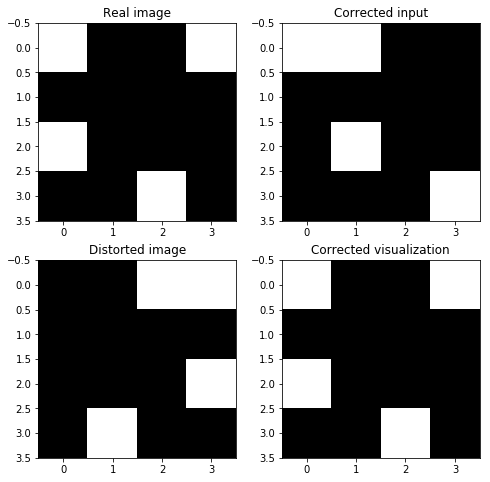

In [9]:
n = 540
print(Mreal_tab[n,:])
vis_matrices(Mreal_tab[n,:].reshape(nbpix,nbpix), Mmang_tab[n,:].reshape(nbpix,nbpix), Mstar_tab[n,:].reshape(nbpix,nbpix), P)

In [10]:
data = pd.DataFrame({"real":Mreal_list,
                    "mang": Mmang_list,
                    "star": Mstar_list})
data.head()
data.count()

real    600
mang    600
star    600
dtype: int64

In [11]:
# let's try to train the model with only one pixel on each figure. 
# then we can use categorical for the result: the cqtegory being the position of the pixel.
# input a grid, output a position between one to 16

# Generating the training data.
idx = range(0,nbpix**2,1)

Mreal_tab = np.zeros((len(idx),nbpix*nbpix))
Mmang_tab = np.zeros((len(idx),nbpix*nbpix))
Mstar_tab = np.zeros((len(idx),nbpix*nbpix))

for ii in idx:
    Mreal_tab[ii,ii] = 1
    Mmang_tab[ii,:] = (Mreal_tab[ii,:].reshape(nbpix,nbpix)@P).reshape(1,nbpix**2)
    Mstar_tab[ii,:] = (Mreal_tab[ii,:].reshape(nbpix,nbpix)@Pstar).reshape(1,nbpix**2)

    

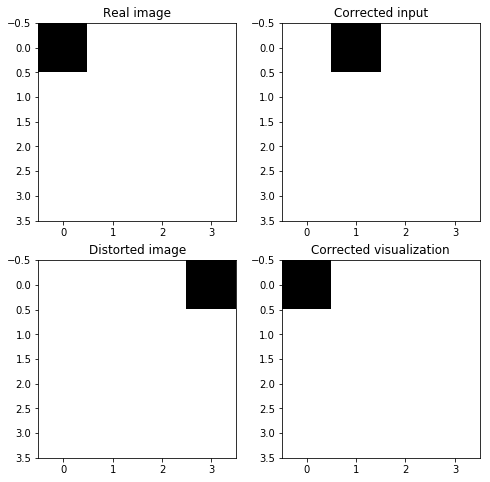

In [12]:
n = 0
vis_matrices(Mreal_tab[n,:].reshape(nbpix,nbpix), Mmang_tab[n,:].reshape(nbpix,nbpix), Mstar_tab[n,:].reshape(nbpix,nbpix), P)    

In [15]:
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from keras.datasets import mnist

C:\Users\MariO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
# the training input will the matrix of the real images with one pixel
X_train = Mreal_tab

In [17]:
# the training output will be the category corresponding to the position of the pixel in the mangled image
y_train = [np.where(Mmang_tab[ii,:]==1)[0].item(0) for ii in idx]
y_train = to_categorical(y_train, nbpix**2)
y_train



array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [18]:
# creating the model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=nbpix**2))
model.add(Dense(100, activation='relu'))
model.add(Dense(nbpix**2, activation='softmax'))

In [19]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1616      
Total params: 13,416
Trainable params: 13,416
Non-trainable params: 0
_________________________________________________________________


In [21]:
# train the model
model.fit( X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 0s - loss: 2.7723 - acc: 0.0625
Epoch 2/100
 - 0s - loss: 2.7520 - acc: 0.0625
Epoch 3/100
 - 0s - loss: 2.7321 - acc: 0.0625
Epoch 4/100
 - 0s - loss: 2.7126 - acc: 0.1250
Epoch 5/100
 - 0s - loss: 2.6935 - acc: 0.1875
Epoch 6/100
 - 0s - loss: 2.6745 - acc: 0.3125
Epoch 7/100
 - 0s - loss: 2.6556 - acc: 0.4375
Epoch 8/100
 - 0s - loss: 2.6367 - acc: 0.5000
Epoch 9/100
 - 0s - loss: 2.6179 - acc: 0.5625
Epoch 10/100
 - 0s - loss: 2.5991 - acc: 0.7500
Epoch 11/100
 - 0s - loss: 2.5802 - acc: 0.9375
Epoch 12/100
 - 0s - loss: 2.5612 - acc: 0.9375
Epoch 13/100
 - 0s - loss: 2.5418 - acc: 0.9375
Epoch 14/100
 - 0s - loss: 2.5220 - acc: 0.9375
Epoch 15/100
 - 0s - loss: 2.5017 - acc: 0.9375
Epoch 16/100
 - 0s - loss: 2.4810 - acc: 1.0000
Epoch 17/100
 - 0s - loss: 2.4600 - acc: 1.0000
Epoch 18/100
 - 0s - loss: 2.4386 - acc: 1.0000
Epoch 19/100
 - 0s - loss: 2.4168 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 2.3944 - acc: 1.0000
Epoch 21/100
 - 0s - loss: 2.3714 - acc: 1.0000
E

In [22]:
model_loss, model_accuracy = model.evaluate(X_train[[2,5,8],:], y_train[[2,5,8],:], verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.07463479042053223, Accuracy: 1.0


In [30]:
test = np.expand_dims(X_train[0], axis=0)
print(X_train[0])
print(test.shape)
res = model.predict(test)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1, 16)


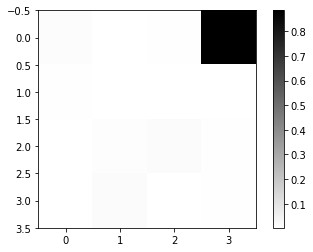

In [24]:
plt.imshow(res.reshape(4,4))
plt.colorbar()
plt.show()

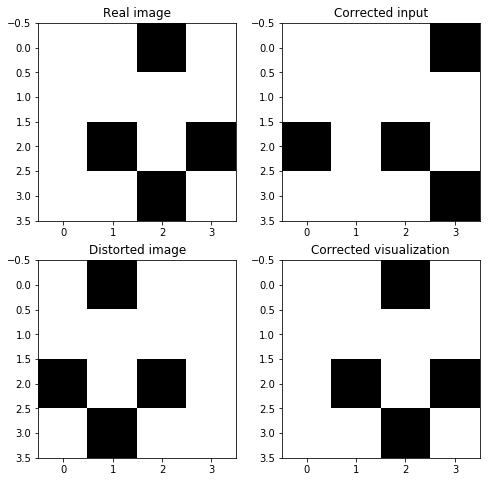

In [27]:
# Now let's use one of the random images, split it up into one pixel images and predict the mangled result
# then, we find the transformation matrix and invert it and tadaaaaa!
cut = 0.4
Mreal = np.random.choice([0, 1], size=(nbpix,nbpix), p=[ 1-cut, cut])
Mmang = Mreal@P
Mstar = Mreal@Pstar
vis_matrices(Mreal, Mmang, Mstar, P)

(1, 16)


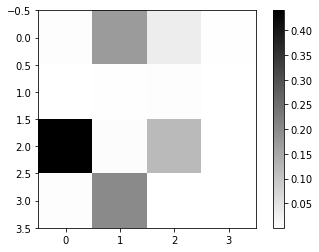

In [47]:
# let's try to use directly the trained model
test = np.expand_dims(Mreal.reshape(1,nbpix**2)[0], axis=0)
print(test.shape)
res = model.predict(test)
plt.imshow(res.reshape(4,4))
plt.colorbar()
plt.show()

In [90]:
# let's split the Mreal matrix into n matrices of one pixel
def add_one(arr,index):
    arr[0,index] = 1
    return arr
# find the indexes of the ones values in the matrix
idx_arr = np.where(Mreal.reshape(1,nbpix**2)[0]==1)[0]
idx_lst = [idx_arr.item(ii) for ii in range(0,len(idx_arr))] # transform from an array to a list

temp = np.zeros((1,nbpix**2))
Mreal_split = np.zeros((len(idx_lst), nbpix**2))
for ii in range(0,len(idx_lst)):
    Mreal_split[ii,idx_lst[ii]] = 1    

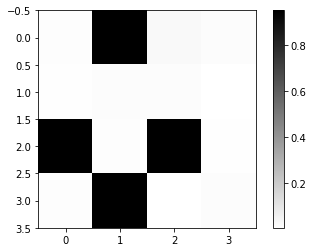

In [104]:
# then lets use the trained model to predict the mangled response of all of these one pixel image
# and we rebuild the full image by adding up all the result matrixes
res = np.zeros((len(idx_lst), nbpix**2))
Mres = np.zeros((nbpix,nbpix))
for ii in range(0,len(idx_lst)):
    res[ii,:] = model.predict(np.expand_dims(Mreal_split[ii], axis=0))
    Mres = Mres + res[ii,:].reshape(nbpix,nbpix)
Mres
plt.imshow(Mres)
plt.colorbar()
plt.show()

In [103]:
# Now that we have the Mreal and the Mres
# let's calculated the estimated transformation matrix
Pest = M

array([[0.00106271, 0.92980552, 0.01026519, 0.00177133, 0.003441  ,
        0.00456045, 0.01110965, 0.00118796, 0.00538641, 0.00238797,
        0.00864589, 0.00182953, 0.00931579, 0.00352275, 0.00261754,
        0.00309028],
       [0.00106271, 0.92980552, 0.01026519, 0.00177133, 0.003441  ,
        0.00456045, 0.01110965, 0.00118796, 0.00538641, 0.00238797,
        0.00864589, 0.00182953, 0.00931579, 0.00352275, 0.00261754,
        0.00309028],
       [0.00106271, 0.92980552, 0.01026519, 0.00177133, 0.003441  ,
        0.00456045, 0.01110965, 0.00118796, 0.00538641, 0.00238797,
        0.00864589, 0.00182953, 0.00931579, 0.00352275, 0.00261754,
        0.00309028],
       [0.00106271, 0.92980552, 0.01026519, 0.00177133, 0.003441  ,
        0.00456045, 0.01110965, 0.00118796, 0.00538641, 0.00238797,
        0.00864589, 0.00182953, 0.00931579, 0.00352275, 0.00261754,
        0.00309028]])

(420, 16)
(180, 16)


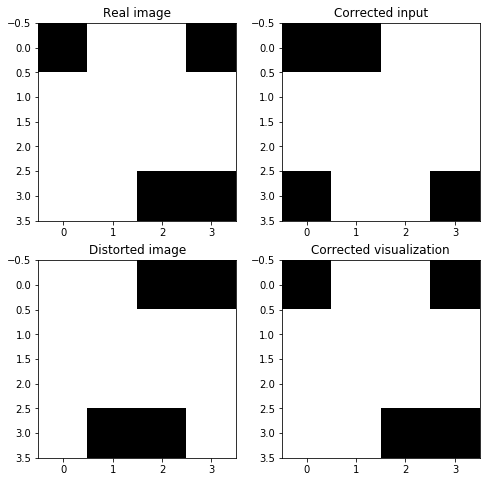

In [244]:
train_idx = np.sort(random.sample(range(1, nb_sample), round(0.7*nb_sample)))

X_train = Mreal_tab[train_idx]
X_test = np.delete(Mreal_tab, train_idx, 0)

y_train = Mstar_tab[train_idx]
y_test =np.delete(Mstar_tab, train_idx, 0)


print(X_train.shape)
print(X_test.shape)

# df2 = data.drop_duplicates()
# df2.count()
n = 30
vis_matrices(X_train[n,:].reshape(nbpix,nbpix), X_train[n,:].reshape(nbpix,nbpix)@P, y_train[n,:].reshape(nbpix,nbpix), P)

- an artificial feed-forward-type multi-layer neural network configured, e.g., using the Error-Backpropagation algorithm; 
- a Hopfield-type Attractor neural network configured with, e.g., the Projection Rule or the Pseudoinverse algorithm; 
- and/or a recurrent neural network trained, e.g., with algo rithms such as Real-Time Recurrent Learning algorithm and the Time-Dependent Recurrent Backpropagation to determine a vision solution. 

C:\Users\MariO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [246]:
# df_train = data.sample(0.8)
# df_test = data.sample(2000)
model = Sequential()

In [249]:
# first hiden layer
